
# Loading modules

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats

import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [429]:
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

# model selection
from sklearn.ensemble import RandomForestClassifier

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline


!pip install imblearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

from imblearn.under_sampling import TomekLinks, ClusterCentroids

# Data

In [430]:
wine_sales = pd.read_csv('wine_sales_data.csv',)

In [431]:

wine_sales.head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


# Exploration

In [432]:
wine_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [433]:

wine_sales['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [434]:

wine_sales['points'].value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

# Preprocessing

In [435]:
wine_sales_portugal = wine_sales[wine_sales.country=="Portugal"]


In [436]:
wine_sales_portugal.head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
64,64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
74,74,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba
91,91,Portugal,"The local Baga grape, better known for produci...",Marquês de Marialva Rosé Bruto,86,12.0,Beira Atlantico,NaN,NaN,Baga,Adega de Cantanhede
94,94,Portugal,This family-owned estate has produced an immed...,Muros de Vinha,86,10.0,Douro,NaN,NaN,Portuguese Red,Quinta do Portal
110,110,Portugal,This state-owned estate of forests and vineyar...,Companhia das Lezírias Herdade de Catapereiro ...,86,12.0,Tejo,NaN,NaN,Portuguese Red,Wines & Winemakers
119,119,Portugal,"This broad, fruity wine brings out ripe berry ...",Convento da Vila,86,7.0,Alentejano,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba
168,168,Portugal,"Structured and firm, this is a dry wine with t...",NaN,89,20.0,Douro,NaN,NaN,Touriga Nacional,Quinta das Carvalhas
210,210,Portugal,"A big, ripe and spicy wine, this is packed wit...",Reserva,93,55.0,Douro,NaN,NaN,Portuguese Red,Poças
229,229,Portugal,"Almost ready to drink, this wood-aged wine is ...",Quinta dos Quatro Ventos Reserva,93,41.0,Douro,NaN,NaN,Portuguese Red,Caves Aliança
238,238,Portugal,"Produced from old vines, this is an impressive...",Dona Maria Reserva,92,40.0,Alentejano,NaN,NaN,Portuguese Red,Dona Maria-Júlio Bastos


In [437]:
wine_sales_verde = wine_sales_portugal[wine_sales_portugal.province=='Vinho Verde']

In [438]:
wine_sales_verde.head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova
1841,1841,Portugal,"High-acid red wine is not for everyone, but th...",Campelo Tinto,84,10.0,Vinho Verde,NaN,NaN,Portuguese Red,Caves Campelo
2136,2136,Portugal,There is a lightly yeasty character to this wi...,Três Castas,82,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
2565,2565,Portugal,Coming from the north of the Vinho Verde regio...,Varanda do Conde,90,NaN,Vinho Verde,NaN,NaN,Portuguese White,Provam


In [439]:
wine_sales_verde['price'].value_counts(normalize=False, sort=True, ascending=False)

9.0     44
12.0    38
10.0    37
8.0     36
13.0    27
7.0     21
11.0    16
6.0     15
15.0    14
5.0     11
16.0     9
17.0     7
18.0     7
21.0     5
14.0     5
20.0     5
19.0     4
22.0     2
24.0     1
25.0     1
33.0     1
45.0     1
23.0     1
26.0     1
35.0     1
Name: price, dtype: int64

In [440]:
wine_sales_verde['price'].min()

5.0

In [441]:
wine_sales_verde['price'].max()

45.0

# Visualisation

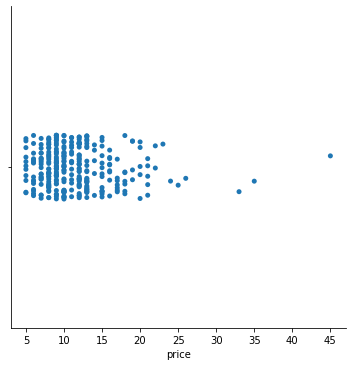

In [442]:
sns.catplot(x = 'price', data = wine_sales_verde)

<AxesSubplot:xlabel='price'>

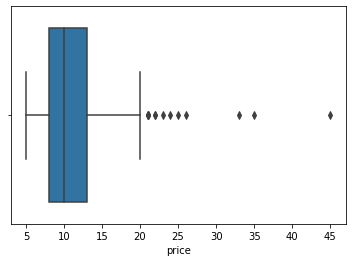

In [443]:
sns.boxplot(x = 'price', data = wine_sales_verde)

In [444]:
wine_sales_verde_clean = wine_sales_verde.loc[(wine_sales_verde['price'] <= 30)]

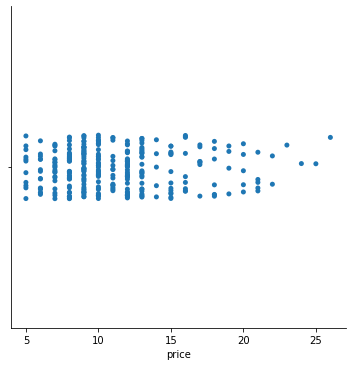

In [445]:
sns.catplot(x = 'price', data = wine_sales_verde_clean)

In [446]:
#df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]


In [447]:
wine_sales_verde_clean = wine_sales_verde.loc[(wine_sales_verde['price'] >= 5) & (wine_sales_verde['price'] <= 20)]

In [ ]:
#Inter quartile range 7 - 12 €, This model uses 5 - 20€ range

In [448]:
wine_sales_verde_clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova


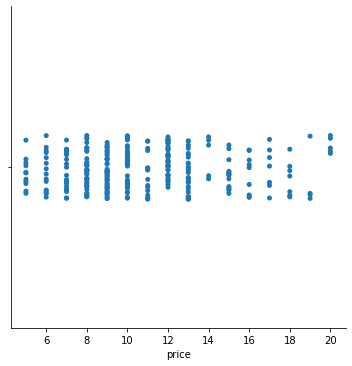

In [449]:
sns.catplot(x = 'price', data = wine_sales_verde_clean)

In [450]:
###
###wine_sales_verde_clean['quality_label'] = wine_sales_verde_clean['quality'].apply(lambda value: 'low'
###if value <= 5 else 'medium'
###if value <= 7 else 'high')

###red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
###categories=['low', 'medium', 'high']) 

# Define The Quality Labels / Classes

In [451]:

wine_sales_verde_clean['quality_label'] = wine_sales_verde_clean['points'].apply(lambda value: 'low'
if value <= 85 else 'medium'
if value <= 88 else 'high')

wine_sales_verde_clean['quality_label'] = pd.Categorical(wine_sales_verde_clean['quality_label'],
categories=['low', 'medium', 'high'])

<ipython-input-451-78719210f388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_sales_verde_clean['quality_label'] = wine_sales_verde_clean['points'].apply(lambda value: 'low'
<ipython-input-451-78719210f388>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_sales_verde_clean['quality_label'] = pd.Categorical(wine_sales_verde_clean['quality_label'],


In [452]:

wine_sales_verde_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 993 to 143575
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     296 non-null    int64   
 1   country        296 non-null    object  
 2   description    296 non-null    object  
 3   designation    224 non-null    object  
 4   points         296 non-null    int64   
 5   price          296 non-null    float64 
 6   province       296 non-null    object  
 7   region_1       0 non-null      object  
 8   region_2       0 non-null      object  
 9   variety        296 non-null    object  
 10  winery         296 non-null    object  
 11  quality_label  296 non-null    category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 28.1+ KB


In [453]:
wine_sales_verde_clean['quality_label'].value_counts()

low       140
medium     93
high       63
Name: quality_label, dtype: int64

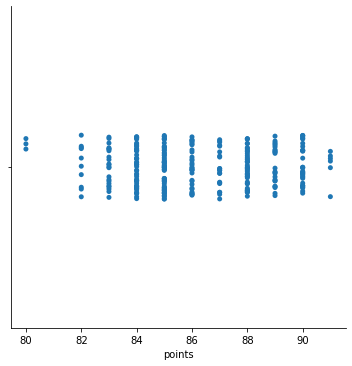

In [454]:
sns.catplot(x = 'points', data = wine_sales_verde_clean)

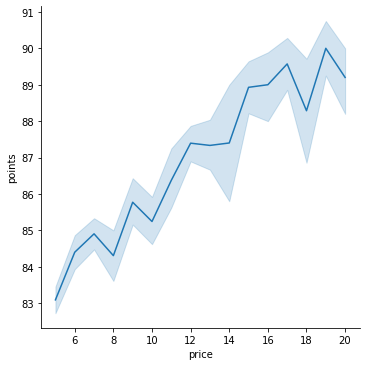

In [455]:
sns.relplot(x = 'price', y = 'points', kind = 'line'   , data = wine_sales_verde_clean )


In [456]:
wine_sales_verde_clean.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'quality_label'],
      dtype='object')

In [457]:
df = wine_sales_verde_clean

In [458]:
list_columns = ['quality_label', 'points', 'price']
  

In [459]:
df = wine_sales_verde_clean[list_columns]

In [460]:
df

,quality_label,points,price
993,low,85,10.0
994,low,85,9.0
1558,low,84,10.0
1559,low,84,10.0
1694,medium,88,12.0
...,...,...,...
141129,low,83,9.0
141143,low,82,8.0
141148,low,82,6.0
143472,medium,86,9.0


In [461]:
df['price'].min()


5.0

In [462]:
df['price'].max()

20.0

In [463]:
#wine_sales_portugal = wine_sales[wine_sales.country=="Portugal"]


In [464]:
df1 = df[df.quality_label== "low"]

In [465]:
df1.min()

points    80.0
price      5.0
dtype: float64

In [466]:
df1.max()

points    85.0
price     18.0
dtype: float64

In [467]:
df2 = df[df.quality_label== "medium"]

In [468]:
df2.min()

points    86.0
price      6.0
dtype: float64

In [469]:
df2.max()

points    88.0
price     20.0
dtype: float64

In [470]:
df2.head(50)

,quality_label,points,price
1694,medium,88,12.0
2947,medium,87,13.0
2962,medium,87,12.0
5205,medium,86,10.0
8726,medium,86,12.0
19673,medium,88,13.0
19915,medium,87,15.0
20099,medium,86,6.0
20274,medium,86,9.0
20911,medium,88,16.0


In [471]:
df3 = df[df.quality_label== "high"]

In [472]:
df3

,quality_label,points,price
2923,high,90,19.0
12740,high,91,17.0
19211,high,90,20.0
24692,high,90,15.0
24817,high,90,17.0
...,...,...,...
136709,high,89,13.0
136987,high,89,11.0
136988,high,89,8.0
136993,high,89,8.0


In [473]:
df3.max()

points    91.0
price     20.0
dtype: float64

In [476]:
df.value_counts("quality_label")

quality_label
low       140
medium     93
high       63
dtype: int64

In [477]:
df.groupby("quality_label").agg(
        min_price=pd.NamedAgg(column='price', aggfunc='min'),
        max_price=pd.NamedAgg(column='price', aggfunc='max'),
        avg_price=pd.NamedAgg(column='price', aggfunc=np.mean),
    )

,min_price,max_price,avg_price
quality_label,,,
low,5.0,18.0,8.728571
medium,6.0,20.0,11.483871
high,8.0,20.0,14.031746


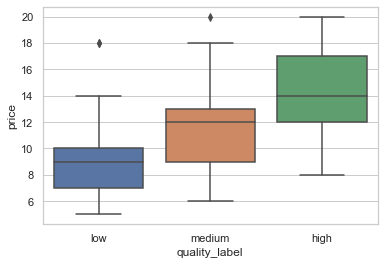

In [478]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["quality_label"], y=df["price"], order=["low", "medium", "high"])

